In [ ]:
# Use this part only if you're using Google Colab
# Initializing the Colaboratory 
from google.colab import drive
import os

drive.mount('/content/drive') # mount Google drive
os.chdir('/content/drive/MyDrive/your_file')  #change to working directory

Mounted at /content/drive


In [ ]:
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from scipy import ndimage

In this code I calculated the histogram of the images, then I implemented an histogram equalization algorithm based on full image.

In [ ]:
#Open image
image_01 = 'fig_2.png'
image_02 = 'fig_1.png'
image_03 = 'Lua.tif'

image_base_01 = cv2.imread(image_01, 0)
image_base_02 = cv2.imread(image_02, 0)
image_base_03 = cv2.imread(image_03, 0)

In [ ]:
def calc_hist(img):
  #Calculating histogram
  hist_img = []
  for k in range(0, 256):
    count = 0
    for i in range(0, img.shape[0]):
      for j in range(0, img.shape[1]):
        if img[i][j] == k:
        #Here I count the frequeny of pixel values
          count = count + 1
    hist_img.append(count)
  return hist_img

In [ ]:
#Equalizing histogram
def eq_hist(img):
  n = calc_hist(img)
  dim = img.shape[0]*img.shape[1]
  #Here I calculate the probability of each value to occur
  pr = np.array(n)/dim
  s = pr.copy()
  img_eq = img.copy()
  ps = np.zeros(shape=(len(n)), dtype=float)
  for i in range(1, len(n)):
    #Here I calculate the cumulative sum
    s[i] = (s[i-1] + s[i])
  s = s*255
  for i in range(len(n)):
    s[i] = round(s[i])
  for i in range(len(n)):
    index = np.where(s==i)[0]
    ps[i] = np.sum(pr[index])
  
  #Here I calculate the equalized image
  for k in range(0, 256):
    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        if img[i][j] == k:
          img_eq[i][j] = s[k]

  plt.figure(figsize=(15, 5))

  plt.subplot(1, 4, 1)
  plt.bar(range(len(n)), n)
  plt.title('Original Histogram')

  plt.subplot(1, 4, 2)
  plt.imshow(img, cmap='gray')
  plt.title('Original Image')
  
  plt.subplot(1, 4, 3)
  plt.bar(range(len(ps)), ps)
  plt.title('Global Equalized Histogram')

  plt.subplot(1, 4, 4)
  plt.imshow(img_eq, cmap='gray')
  plt.title('Global Equalized Image')
  print(n)

[2230, 102029, 3434, 2508, 1792, 1641, 2026, 1366, 1723, 1293, 1227, 872, 1117, 818, 1112, 899, 851, 836, 738, 825, 971, 475, 1016, 995, 492, 1013, 623, 969, 493, 976, 490, 631, 950, 623, 505, 995, 464, 600, 452, 594, 1012, 486, 425, 530, 432, 481, 391, 365, 424, 320, 413, 315, 314, 398, 288, 303, 265, 288, 327, 23, 259, 360, 280, 333, 254, 245, 15, 343, 266, 328, 253, 22, 262, 354, 238, 25, 335, 293, 292, 30, 334, 274, 332, 30, 263, 248, 28, 344, 221, 26, 357, 264, 34, 370, 285, 20, 307, 363, 21, 255, 30, 345, 278, 32, 257, 350, 26, 203, 27, 297, 23, 238, 223, 30, 261, 29, 236, 28, 286, 202, 15, 260, 33, 202, 21, 209, 17, 276, 21, 190, 30, 287, 215, 18, 198, 17, 253, 12, 209, 25, 236, 30, 192, 27, 153, 9, 9, 259, 33, 207, 20, 246, 22, 166, 14, 171, 23, 234, 21, 159, 7, 12, 215, 12, 167, 16, 187, 16, 142, 10, 6, 128, 16, 183, 18, 121, 7, 6, 146, 17, 129, 9, 138, 4, 14, 154, 16, 114, 3, 9, 156, 16, 123, 3, 6, 126, 13, 182, 10, 4, 122, 15, 161, 7, 5, 99, 23, 155, 2, 4, 112, 14, 3, 106, 1

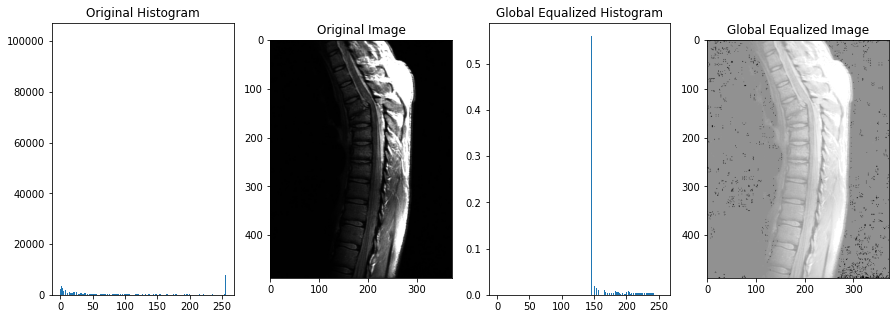

In [ ]:
eq_hist(image_base_01)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 477, 16986, 379, 572, 1917, 8955, 2129, 16228, 10188, 3327, 5751, 1406, 4224, 1266, 4332, 2539, 2830, 5529, 2141, 3653, 2187, 4142, 3227, 5808, 3019, 4913, 6980, 4303, 3729, 4048, 6398, 1849, 6581, 1762, 6731, 9532, 3374, 5324, 2989, 4945, 3840, 3528, 3609, 5614, 5712, 1385, 4312, 2731, 3788, 1018, 3184, 863, 1910, 3471, 2638, 697, 2341, 1434, 1339, 1378, 1744, 971, 2267, 1460, 861, 909, 158, 141, 16, 9, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


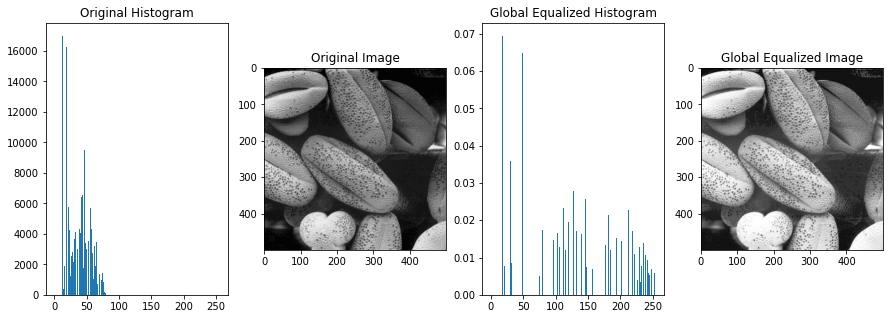

In [ ]:
eq_hist(image_base_02)

[142493, 6999, 9564, 540, 423, 400, 323, 304, 296, 288, 280, 245, 240, 257, 264, 251, 226, 231, 228, 233, 239, 248, 246, 229, 197, 274, 248, 217, 245, 242, 249, 272, 254, 244, 247, 262, 252, 232, 259, 257, 257, 243, 266, 249, 239, 256, 270, 278, 279, 264, 276, 287, 272, 266, 296, 306, 323, 321, 318, 339, 331, 363, 348, 356, 357, 366, 351, 356, 391, 398, 377, 405, 368, 389, 359, 367, 362, 329, 333, 314, 332, 334, 318, 321, 383, 477, 434, 446, 468, 448, 444, 484, 488, 475, 518, 505, 528, 600, 522, 589, 585, 561, 597, 572, 605, 583, 590, 630, 636, 655, 651, 759, 714, 772, 777, 769, 822, 832, 809, 880, 856, 894, 936, 891, 936, 907, 883, 914, 859, 889, 835, 867, 841, 793, 745, 780, 753, 703, 681, 681, 673, 657, 623, 649, 658, 661, 574, 576, 563, 538, 583, 529, 587, 547, 582, 529, 609, 556, 581, 518, 509, 576, 524, 512, 445, 517, 425, 488, 401, 450, 414, 400, 430, 382, 376, 374, 329, 342, 367, 343, 302, 323, 297, 287, 270, 268, 265, 239, 232, 244, 242, 230, 235, 226, 209, 216, 192, 192, 186,

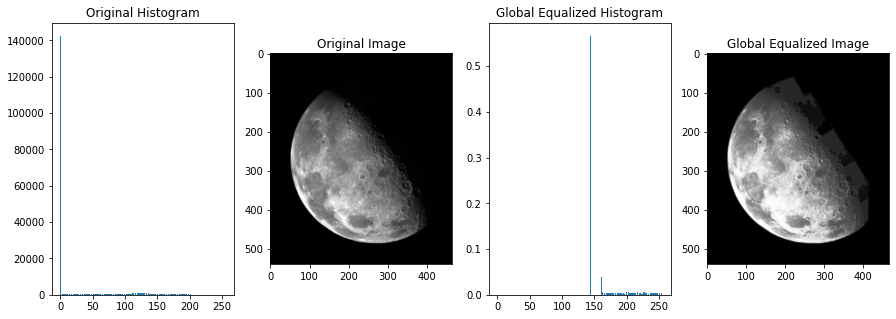

In [ ]:
eq_hist(image_base_03)